In [46]:
#패키지 설정                               
from sklearn.preprocessing import StandardScaler         #정규화 모듈 설정
from sklearn.model_selection import train_test_split       #학습용과 테스트용 분리
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential        #딥러닝 모형화
from keras.layers import Dense           #층간 노드 모두 연결
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df = pd.read_excel('/content/drive/MyDrive/대학원/1학기/1. 고급통계분석(김영순)/z. 기말고사 과제/주가 자료 원본/삼성전자 주가 관련 자료(엑셀)-3.xlsx')

print(df.head(3))

          일자     시가     고가     저가     종가  전일비  7 거래일 이내 최고 상승률    등락  주가등락률  \
0 2022-12-05  60900  61100  60000  60300    0                0  -100  -0.17   
1 2022-12-02  62500  62500  60400  60400    0                0 -2200  -3.51   
2 2022-12-01  63100  63200  62300  62600    1                0   400   0.64   

        거래량  ...  사모펀드(KOSPI)  기타법인(KOSPI)    기준환율  환율 증감  Open(NASDAQ)  \
0  13767787  ...         -913           59  1292.6   -7.3   11380.99023   
1  15331184  ...         -776           31  1299.9    0.2   11308.37988   
2  16631445  ...          -37          191  1299.7  -19.1   11475.16992   

   High(NASDAQ)  Low(NASDAQ)  Close(NASDAQ)  Volume(NASDAQ)  나스닥 등락율  
0   11425.50977  11193.01953    11239.94043      4510030000    -0.02  
1   11492.32031  11296.71973    11461.50000      4523010000     0.00  
2   11546.76953  11378.75000    11482.45020      5158120000     0.00  

[3 rows x 45 columns]


In [49]:
df['7 거래일 이내 최고 상승률'].value_counts()

1    789
2    146
3     25
0      7
4      2
Name: 7 거래일 이내 최고 상승률, dtype: int64

In [50]:
df.set_index('일자',inplace=True)
df = df.astype('float')   #inplace 가 없음

In [51]:
X = df.drop('7 거래일 이내 최고 상승률', axis=1)
y=df[['7 거래일 이내 최고 상승률']]   #목표변수의 데이터 프레임
y = y.astype(int)
print(y)

            7 거래일 이내 최고 상승률
일자                         
2022-12-05                0
2022-12-02                0
2022-12-01                0
2022-11-30                0
2022-11-29                0
...                     ...
2019-01-09                2
2019-01-08                3
2019-01-07                2
2019-01-04                2
2019-01-03                2

[969 rows x 1 columns]


In [52]:
X.columns

Index(['시가', '고가', '저가', '종가', '전일비', '등락', '주가등락률', '거래량', '장전거래', '장중거래',
       '장후거래', '금액(백만)', '신용비', '개인', '기관', '외인(수량)', '외국계', '프로그램', '외인비',
       'KOSPI', '전일비(KOSPI)', '등락(KOSPI)', '등락률(KOSPI)', '거래대금(KOSPI)',
       '개인(KOSPI)', '외국인(KOSPI)', '기관계(KOSPI)', '금융투자(KOSPI)', '보험(KOSPI)',
       '투신(KOSPI)', '기타금융(KOSPI)', '은행(KOSPI)', '연기금등(KOSPI)', '사모펀드(KOSPI)',
       '기타법인(KOSPI)', '기준환율', '환율 증감', 'Open(NASDAQ)', 'High(NASDAQ)',
       'Low(NASDAQ)', 'Close(NASDAQ)', 'Volume(NASDAQ)', '나스닥 등락율'],
      dtype='object')

### PCA 적용

In [53]:
#데이터 표준화
scalerX = StandardScaler()
scalerX.fit(X)
X_std = scalerX.transform(X)
X_std

array([[-0.07108285, -0.09832409, -0.09535167, ...,  0.01560147,
         0.29854255, -1.21238983],
       [ 0.04949357,  0.00658897, -0.06502441, ...,  0.09919242,
         0.30709062, -0.04109796],
       [ 0.09470973,  0.0590455 ,  0.07903003, ...,  0.1070966 ,
         0.72534706, -0.04109796],
       ...,
       [-1.79683279, -1.76194545, -1.77851415, ..., -1.65066357,
        -1.00973456,  0.54454797],
       [-1.83828093, -1.85936472, -1.85054137, ..., -1.68258573,
        -0.96185743,  2.30148577],
       [-1.77422471, -1.78817372, -1.80505049, ..., -1.78647469,
        -0.9385445 , -1.79803576]])

In [54]:
from sklearn.decomposition import PCA
#주성분분석 객체 생성
pca = PCA()

#주성분분석
pca.fit(X_std)

PCA()

Text(0, 0.5, 'Variance Ratio')

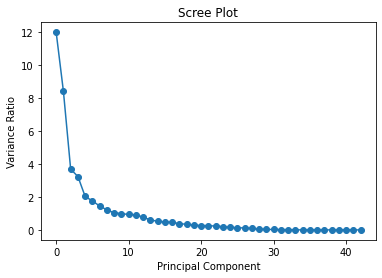

In [55]:
#주성분 분산
plt.plot(pca.explained_variance_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')

# 4

In [56]:
import numpy as np
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(X.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,1.197414e+01,2.781809e-01,0.278181
pca2,8.394283e+00,1.950144e-01,0.473195
pca3,3.682395e+00,8.554873e-02,0.558744
pca4,3.233719e+00,7.512516e-02,0.633869
pca5,2.027425e+00,4.710076e-02,0.680970
pca6,1.754999e+00,4.077180e-02,0.721742
pca7,1.448859e+00,3.365962e-02,0.755401
pca8,1.213972e+00,2.820277e-02,0.783604
pca9,1.039056e+00,2.413916e-02,0.807743
pca10,9.864525e-01,2.291708e-02,0.830660


In [57]:
X_std_pca = pca.fit_transform(X_std)[:,:22]

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X_std_pca,y,test_size=0.3, random_state=1)    #학습용과 데이터 분리(7:3)

In [59]:
X_train.shape

(678, 22)

In [60]:
y_train.reset_index(inplace=True)
y_train2 = np.array(y_train['7 거래일 이내 최고 상승률'])
y_test.reset_index(inplace=True)
y_test2 = np.array(y_test['7 거래일 이내 최고 상승률'])

In [61]:
y_train['7 거래일 이내 최고 상승률'].value_counts()

1    554
2    102
3     17
0      4
4      1
Name: 7 거래일 이내 최고 상승률, dtype: int64

In [62]:
y_test['7 거래일 이내 최고 상승률'].value_counts()

1    235
2     44
3      8
0      3
4      1
Name: 7 거래일 이내 최고 상승률, dtype: int64

In [63]:
import numpy as np
y_train2 = pd.get_dummies(y_train2)
y_test2 = pd.get_dummies(y_test2)

In [66]:
#모형 구조
import tensorflow as tf
model=Sequential()       #순차모형
model.add(Dense(30,activation='relu', input_shape=(22,)))      #제1은닉층과 입력층
#model.add(Dense(15,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                690       
                                                                 
 dense_9 (Dense)             (None, 5)                 155       
                                                                 
Total params: 845
Trainable params: 845
Non-trainable params: 0
_________________________________________________________________


In [67]:
#모형구성
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy',tf.keras.metrics.Precision(name='precision')])

In [68]:
#학습
results=model.fit(X_train, y_train2,                 #학습데이터
	        validation_data=(X_test, y_test2),	   #테스트데이터	
	        epochs=100,batch_size=32)

Epoch 1/100
22/22 [==============================] - 2s 38ms/step - loss: 1.9807 - accuracy: 0.1873 - precision: 0.2063 - val_loss: 1.6719 - val_accuracy: 0.2543 - val_precision: 0.3810
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 1.4186 - accuracy: 0.4277 - precision: 0.6963 - val_loss: 1.2254 - val_accuracy: 0.5601 - val_precision: 0.7838
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 1.0674 - accuracy: 0.6932 - precision: 0.8073 - val_loss: 0.9760 - val_accuracy: 0.7216 - val_precision: 0.7861
Epoch 4/100
22/22 [==============================] - 0s 13ms/step - loss: 0.8701 - accuracy: 0.7802 - precision: 0.8031 - val_loss: 0.8452 - val_accuracy: 0.7732 - val_precision: 0.7930
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.7644 - accuracy: 0.8142 - precision: 0.8158 - val_loss: 0.7758 - val_accuracy: 0.7904 - val_precision: 0.7928
Epoch 6/100
22/22 [==============================] - 0s 18ms/step - loss:

In [69]:
#학습모형에 저장된 키(변수)
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])


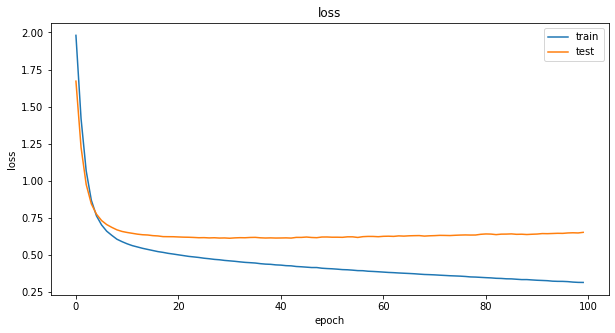

In [70]:
#학습 수에 따른 loss변화
plt.figure(figsize=(10,5))
plt.plot(results.history['loss'])    #학습데이터의 손실
plt.plot(results.history['val_loss'])     #테스트데이터의 손실
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper right')
plt.show()

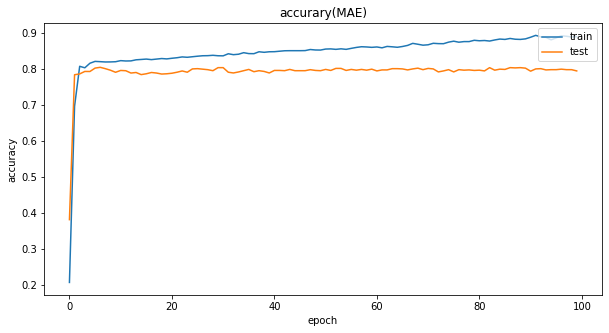

In [71]:
#학습 수에 따른 정확도(mae)변화
plt.figure(figsize=(10,5))
plt.plot(results.history['precision'])      #학습데이터의 오차
plt.plot(results.history['val_precision'])   #테스트 데이터의 오차
plt.title('accurary(MAE)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [72]:
y_pred=np.argmax(model.predict(X_test), axis=1)
y_test = y_test['7 거래일 이내 최고 상승률']
import sklearn
sklearn.metrics.confusion_matrix(y_test, y_pred)

10/10 [==============================] - 0s 2ms/step


array([[  0,   3,   0,   0,   0],
       [  0, 221,  13,   1,   0],
       [  0,  36,   8,   0,   0],
       [  0,   7,   1,   0,   0],
       [  0,   1,   0,   0,   0]])

In [73]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)

pre = precision_score(y_test, y_pred, average='weighted')
print('precision_score : ', pre)

recall = recall_score(y_test, y_pred, average='weighted')
print('recall_score: ', recall)

accuracy_score :  0.7869415807560137
precision_score :  0.7209186028619787
recall_score:  0.7869415807560137


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
